In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad

In [18]:
def z_score_normalization(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [58]:
df = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/raw/Tonsil/2_image_extraction/Final_lung_clustered_output.csv')

In [42]:
df

,Sars_CoV2_Spike(In113Di),CD45RO(In115Di),CD45RA(Pr141Di),CD68(Nd142Di),CD8a(Nd143Di),Ki67(Nd144Di),Collagen1(Nd145Di),CD138(Nd146Di),CD163(Sm147Di),IL1R(Nd148Di),...,ROI_number,Patient_number,Pathology_index,Batch_number,File Identifier,Classification Identifier,Batch SOM Cluster Assignments,Consensus Clustering Assignments,UMAP_1 Zscore,UMAP_2 Zscore
0,0.000000,0.212013,0.183492,0.590201,0.198198,0.719513,1.136628,0.265832,0.357357,0.247466,...,1.0,7.0,7.0,1.0,0.991689,0,83,18,-1.116137,-3.164932
1,0.027168,0.253103,0.359419,0.702204,0.400291,0.968474,1.295827,0.529966,0.192590,0.572809,...,1.0,7.0,7.0,1.0,0.921377,0,88,3,-1.862654,5.096474
2,0.183842,0.198690,0.196656,0.879164,0.179570,0.561875,0.386065,0.000000,0.564418,0.198689,...,1.0,7.0,7.0,1.0,1.006101,0,33,27,-1.812565,3.716027
3,0.001663,0.145978,0.230677,0.421903,0.272099,0.804291,1.056270,0.388558,0.190896,0.208673,...,1.0,7.0,7.0,1.0,1.084483,0,84,1,-2.207636,-0.263098
4,0.033857,0.192975,0.643672,0.644134,0.673276,1.253959,0.863721,0.732858,0.422460,0.432949,...,1.0,7.0,7.0,1.0,1.039004,0,98,3,-1.945173,5.815402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901597,0.000000,0.261092,0.185824,0.240785,0.140266,0.365590,0.325052,0.149567,0.072502,0.112967,...,351.0,5.0,3.0,12.0,344.914398,344,72,21,-0.989392,-3.330052
901598,0.000000,0.549166,0.251643,0.965217,0.077316,0.402170,0.937308,0.244396,0.899945,0.186418,...,351.0,5.0,3.0,12.0,344.999268,344,25,6,7.155590,-3.765458
901599,0.048955,0.207148,0.141000,0.239474,0.095702,0.725645,0.757850,0.259773,0.110995,0.419263,...,351.0,5.0,3.0,12.0,344.966217,344,2,2,-1.196208,1.025251
901600,0.023968,0.171990,0.108249,0.320312,0.113016,1.738993,0.759665,0.326326,0.114440,0.335249,...,351.0,5.0,3.0,12.0,345.079376,344,55,0,-4.258420,3.824040


In [59]:
df.drop(columns=[x for x in df.columns if x.endswith('Znorm')], inplace=True)
df.drop(columns=['193Ir(Ir193Di)'], inplace=True)

In [130]:
X_columns = df.columns[:df.columns.get_loc('Area')]
obs_columns = df.columns[df.columns.get_loc('Area'):]
adata = ad.AnnData(
    X=df[X_columns],
    obs=df[obs_columns],
    var=pd.DataFrame(index=X_columns)
)

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [131]:
markers = ['CD45RO(In115Di)', 'CD45RA(Pr141Di)','CD68(Nd142Di)', 'CD8a(Nd143Di)', 'Ki67(Nd144Di)', 'Collagen1(Nd145Di)','CD138(Nd146Di)', 'CD163(Sm147Di)', 'IL1R(Nd148Di)', 'CD42b(Sm149Di)', 'MPO(Nd150Di)', 'CD56(Eu153Di)', 'Podoplanin(Sm154Di)', 'EPCAM(Gd156Di)', 'CD206(Gd157Di)', 'CD79a(Gd158Di)', 'STING(Tb159Di)', 'CD1c(Dy162Di)', 'CD57(Ho165Di)', 'cCaspase3(Er168Di)', 'CD3(Er170Di)', 'CD31(Yb172Di)', 'CD4(Yb174Di)', 'HLADR(Lu175Di)', 'CD169(Yb176Di)']

In [132]:
adata_subset = adata[:, adata.var_names.isin(markers)].copy()

In [133]:
adata.raw = adata
adata.X = z_score_normalization(adata.X)

In [134]:
adata_subset.raw = adata_subset
adata_subset.X = z_score_normalization(adata_subset.X)

In [135]:
adata.obs['Consensus Clustering Assignments'] = adata.obs['Consensus Clustering Assignments'].astype('category')
adata_subset.obs['Consensus Clustering Assignments'] = adata_subset.obs['Consensus Clustering Assignments'].astype('category')

In [85]:
umap_cols = ['UMAP_1 Zscore', 'UMAP_2 Zscore']
adata.obsm['X_umap'] = df[umap_cols].values

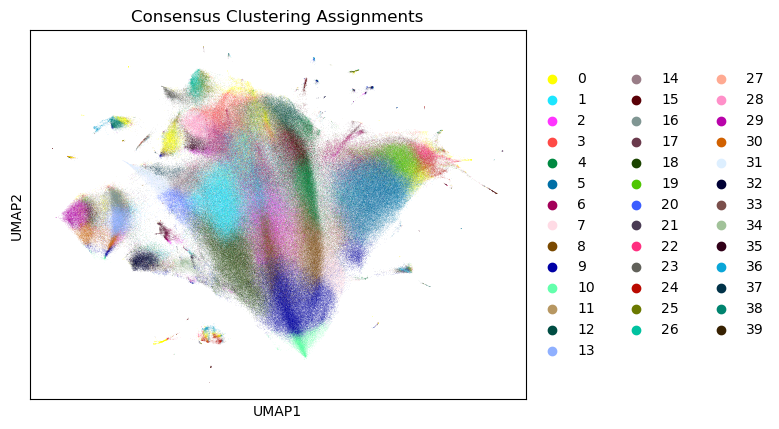

In [87]:
sc.pl.umap(adata, color='Consensus Clustering Assignments')

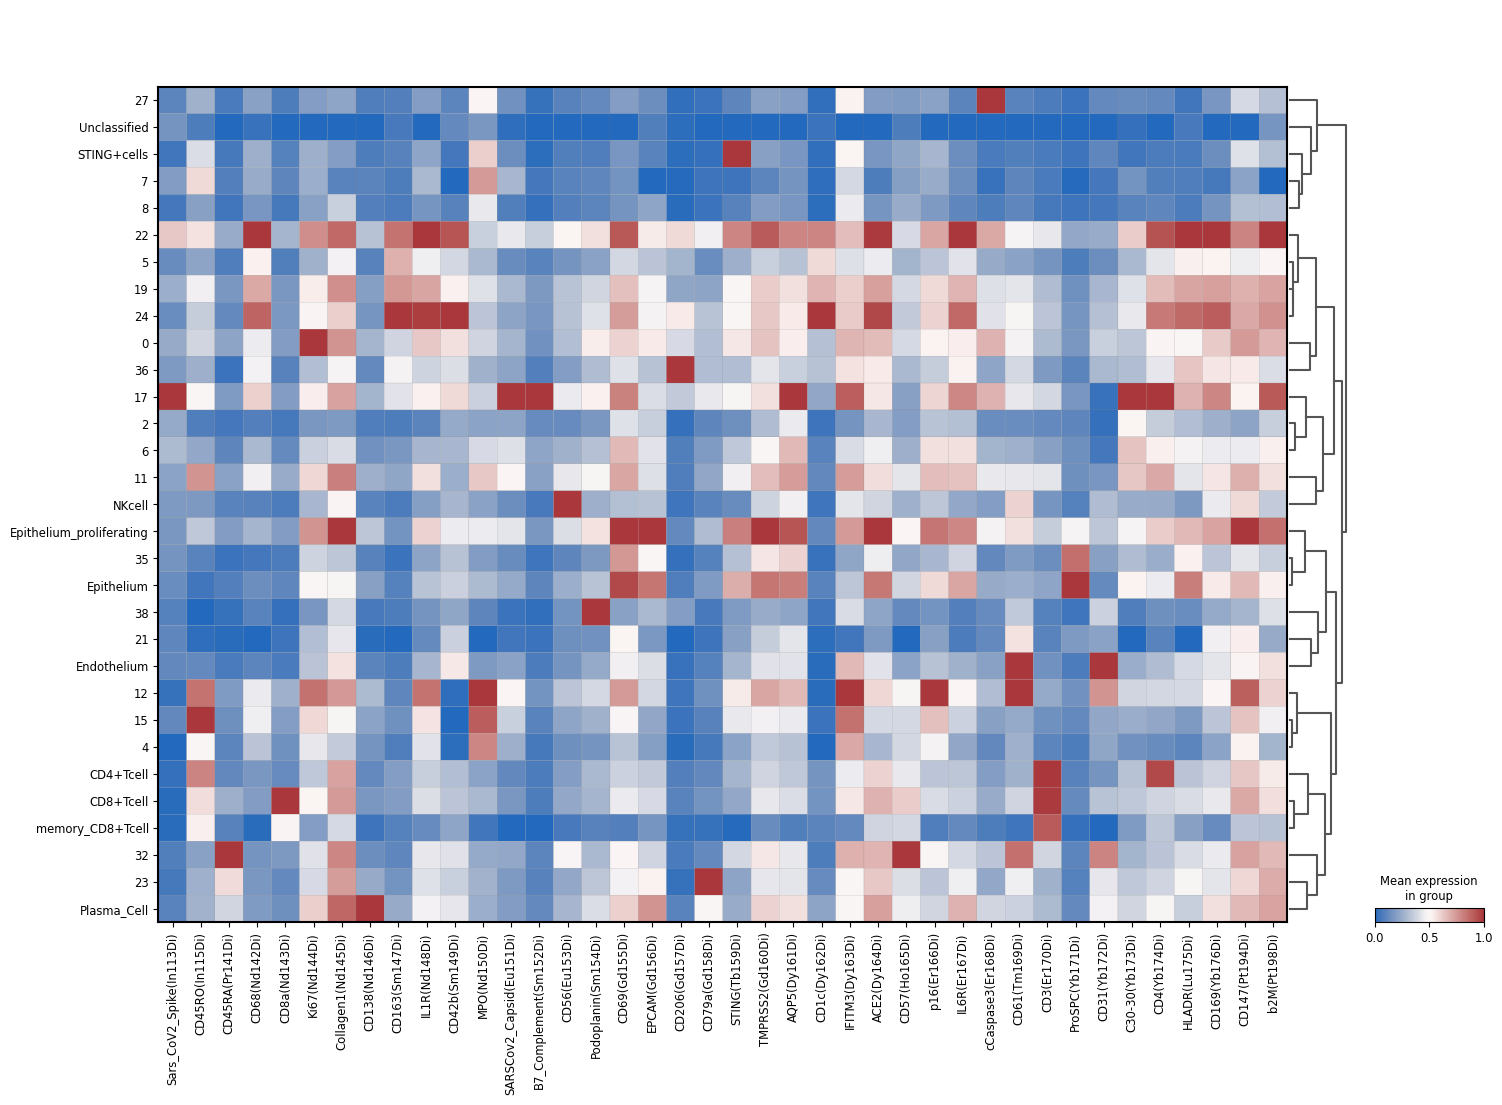

In [140]:
sc.pl.matrixplot(adata, var_names=adata.var_names, groupby='Consensus Clustering Assignments', cmap='vlag', dendrogram=True, use_raw=False, standard_scale='var')

In [136]:
rename_dict = {'29': 'CD8+Tcell', '39': 'CD8+Tcell', '30': 'memory_CD8+Tcell', '25': 'Plasma_Cell', '26': 'Plasma_Cell', '16': 'CD4+Tcell', '13': 'CD4+Tcell', '34': 'NKcell', '28': 'Epithelium', '3': 'Epithelium_proliferating', '18': 'Endothelium', '1': 'Endothelium', '14': 'Endothelium', '20': 'Endothelium', '31': 'Endothelium', '37': 'Endothelium', '10': 'Unclassified', '9': 'Unclassified', '33': 'STING+cells', '27': 'Apoptotic_cells', '23': 'Bcells', }


In [137]:
adata.obs['Consensus Clustering Assignments'] = adata.obs['Consensus Clustering Assignments'].astype(str)
adata_subset.obs['Consensus Clustering Assignments'] = adata_subset.obs['Consensus Clustering Assignments'].astype(str)

In [138]:
adata.obs['Consensus Clustering Assignments'] = (
    adata.obs['Consensus Clustering Assignments']
    .map(rename_dict)
    .fillna(adata.obs['Consensus Clustering Assignments'])
)

adata_subset.obs['Consensus Clustering Assignments'] = (
    adata_subset.obs['Consensus Clustering Assignments']
    .map(rename_dict)
    .fillna(adata_subset.obs['Consensus Clustering Assignments'])
)

In [139]:
adata.obs['Consensus Clustering Assignments'] = adata.obs['Consensus Clustering Assignments'].astype('category')
adata_subset.obs['Consensus Clustering Assignments'] = adata_subset.obs['Consensus Clustering Assignments'].astype('category')

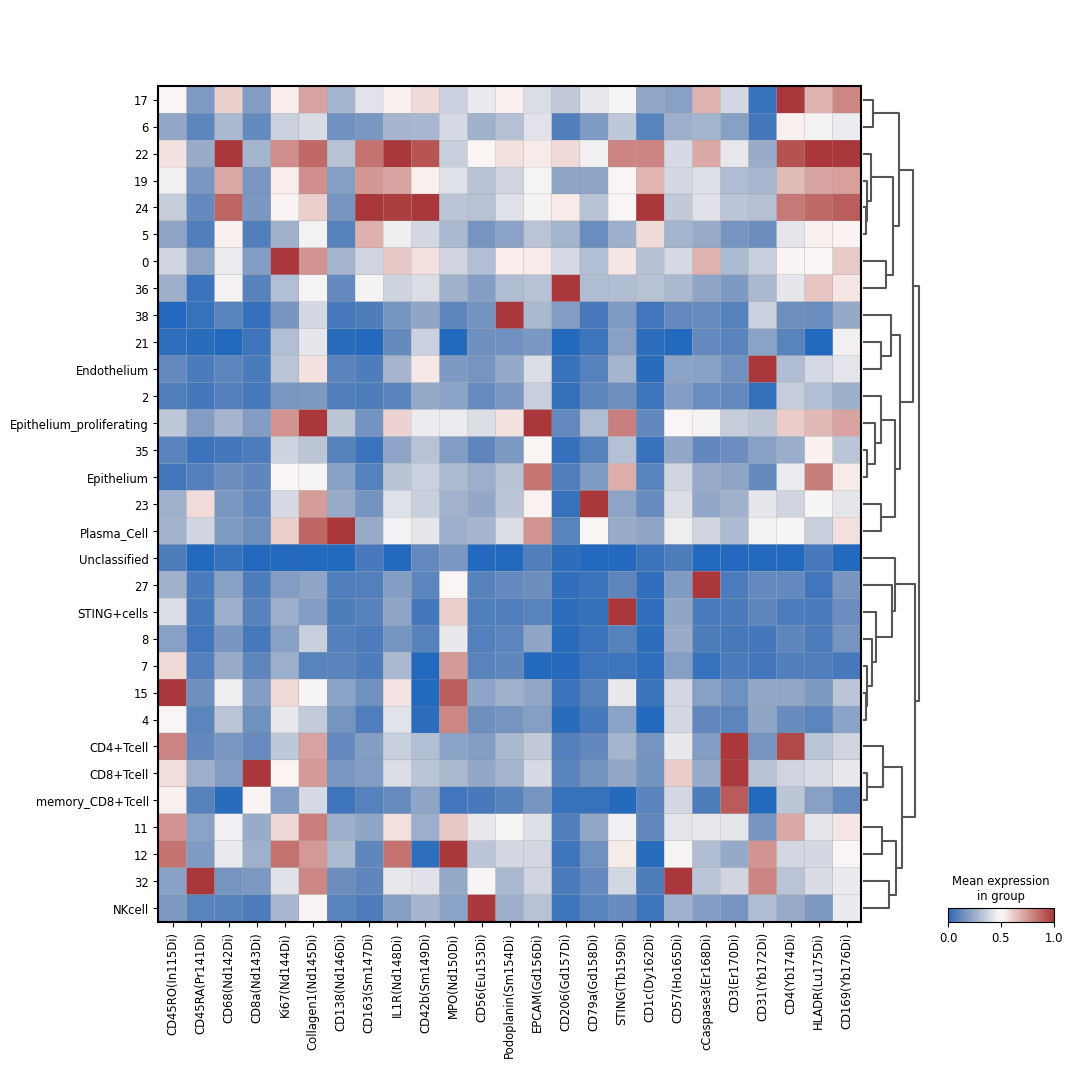

In [143]:
sc.pl.matrixplot(adata_subset, var_names=adata_subset.var_names, groupby='Consensus Clustering Assignments', cmap='vlag', dendrogram=True, use_raw=False, standard_scale='var')

In [90]:
adata_subset

AnnData object with n_obs × n_vars = 901602 × 25
    obs: 'Area', 'Centroid_X', 'Centroid_Y', 'Circularity', 'Eccentricity', 'ROI_number', 'Patient_number', 'Pathology_index', 'Batch_number', 'File Identifier', 'Classification Identifier', 'Batch SOM Cluster Assignments', 'Consensus Clustering Assignments', 'UMAP_1 Zscore', 'UMAP_2 Zscore'
    uns: 'Consensus Clustering Assignments_colors', 'dendrogram_Consensus Clustering Assignments'
    obsm: 'X_umap'

In [16]:
sc.tl.rank_genes_groups(adata, groupby='Consensus Clustering Assignments' , method='logreg')

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


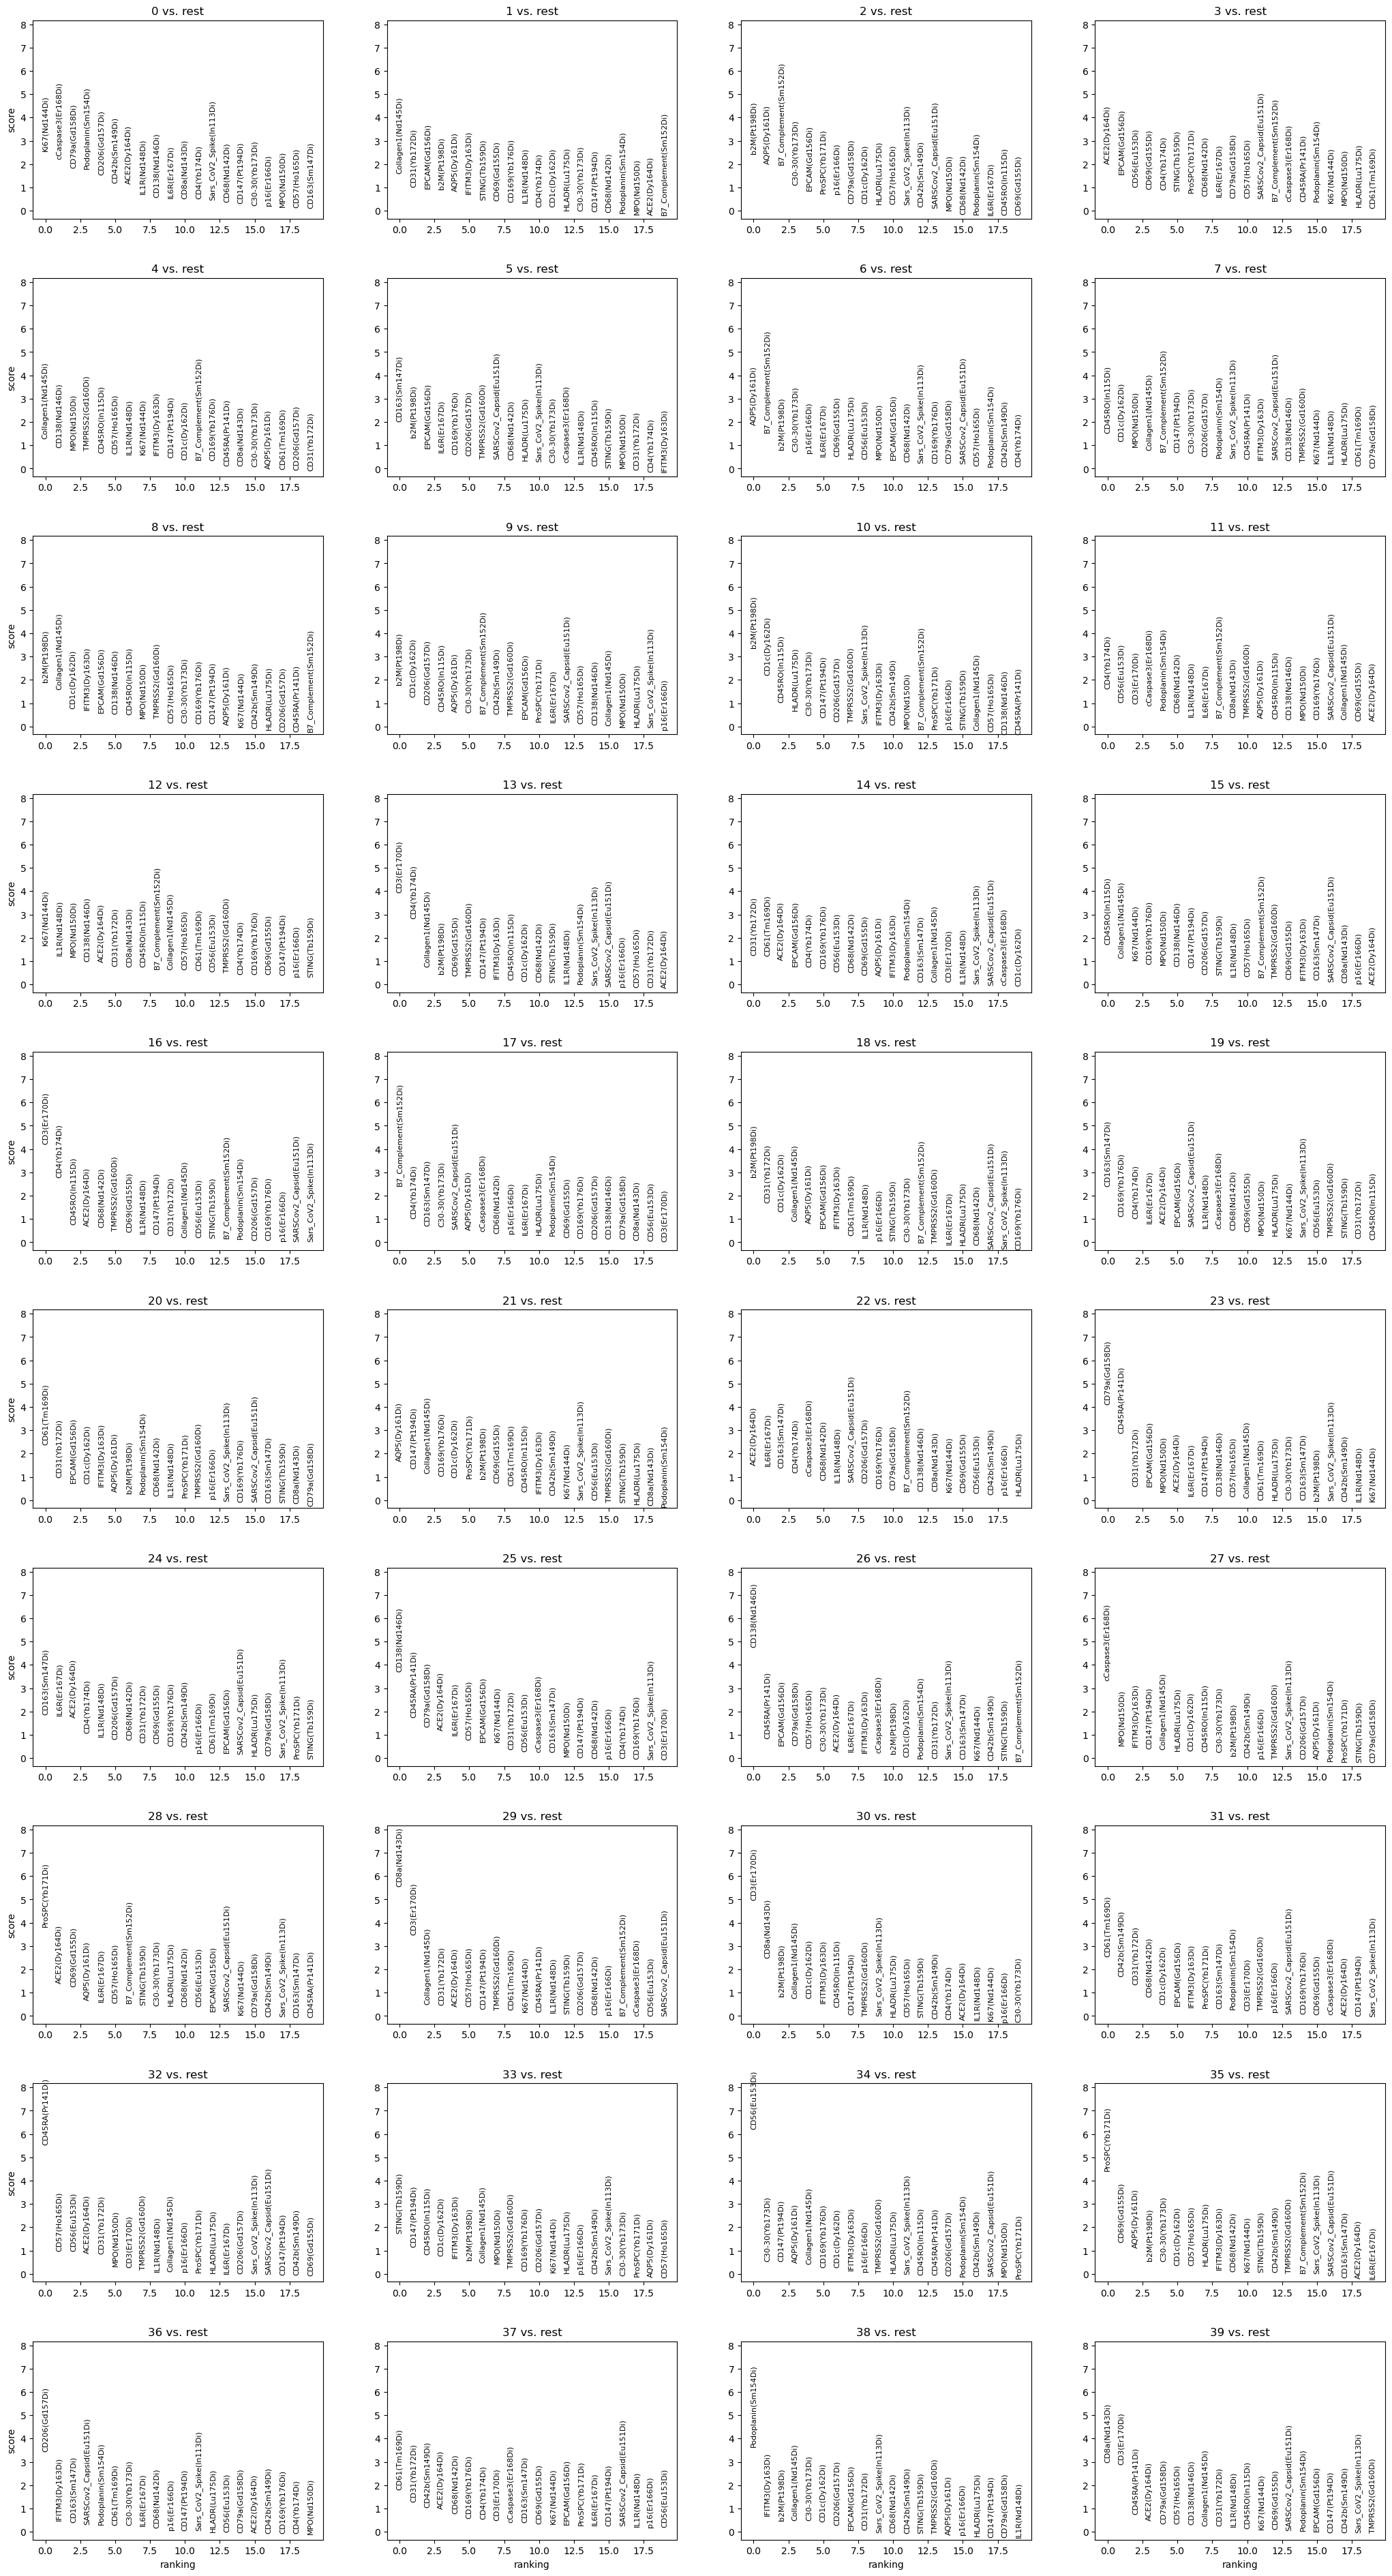

In [17]:
sc.pl.rank_genes_groups(adata)

In [37]:
# Define the groups you want to visualize
groups_to_visualize = ['39', '29', '30']  # Replace with actual group names or values

adata.obs['Consensus Clustering Assignments'] = adata.obs['Consensus Clustering Assignments'].astype(str)

# Subset the AnnData object
adata_subset = adata[adata.obs['Consensus Clustering Assignments'].isin(groups_to_visualize)]

In [39]:
adata_subset.X = np.arcsinh(adata_subset.X)

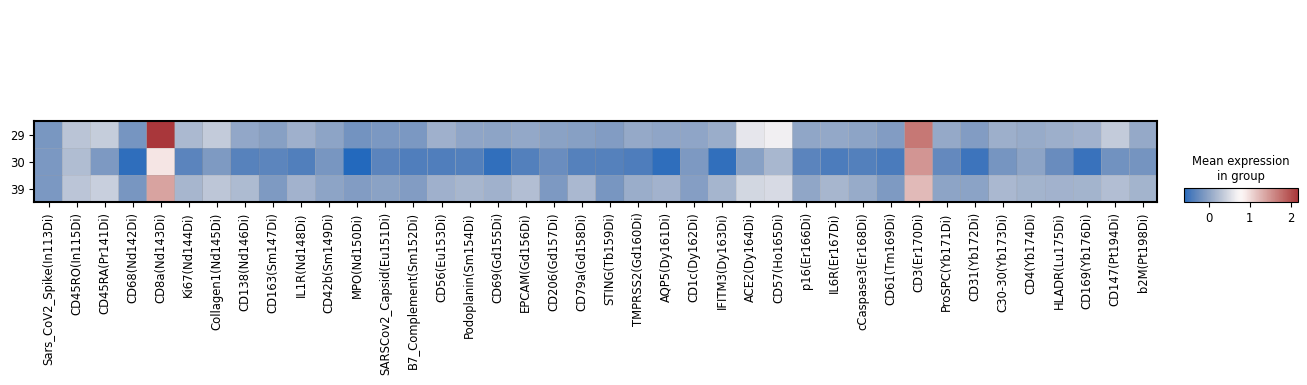

In [40]:
sc.pl.matrixplot(
    adata_subset,
    var_names=adata.var_names,
    groupby='Consensus Clustering Assignments',
    cmap='vlag',
)